In [3]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="picnn_fnlvqr_banana",
    dataset_number_of_points=10**4,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=2,
        number_of_hidden_layers=4,
        n_blocks=4,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=1,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
model.load("sample.pth")

Epoch: 1, Loss: -200.715, LR: 0.000000: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


CPFlow(
  (flow): SequentialFlow(
    (flows): ModuleList(
      (0): ActNorm(2)
      (1): DeepConvexFlow(
        ConjGrad(rtol=0.0, atol=0.001)
        (icnn): PICNN(
          (act): Softplus()
          (act_c): ELU(alpha=1.0)
          (Wzs): ModuleList(
            (0): Linear(in_features=2, out_features=2, bias=True)
            (1-3): 3 x PosLinear(in_features=2, out_features=2, bias=True)
            (4): PosLinear(in_features=2, out_features=1, bias=False)
          )
          (Wxs): ModuleList(
            (0-2): 3 x Linear(in_features=2, out_features=2, bias=True)
            (3): Linear(in_features=2, out_features=1, bias=False)
          )
          (Wcs): ModuleList(
            (0): Linear(in_features=1, out_features=2, bias=True)
          )
          (Wczs): ModuleList(
            (0-3): 4 x Linear(in_features=2, out_features=2, bias=True)
          )
          (Wcxs): ModuleList(
            (0-3): 4 x Linear(in_features=2, out_features=2, bias=True)
          )
 

In [ ]:
# model.save("sample.pth")

In [10]:
from pushforward_operators import CPFlow

model = CPFlow.load_class("sample.pth")
model.load("sample.pth")

CPFlow(
  (flow): SequentialFlow(
    (flows): ModuleList(
      (0): ActNorm(2)
      (1): DeepConvexFlow(
        ConjGrad(rtol=0.0, atol=0.001)
        (icnn): PICNN(
          (act): Softplus()
          (act_c): ELU(alpha=1.0)
          (Wzs): ModuleList(
            (0): Linear(in_features=2, out_features=2, bias=True)
            (1-3): 3 x PosLinear(in_features=2, out_features=2, bias=True)
            (4): PosLinear(in_features=2, out_features=1, bias=False)
          )
          (Wxs): ModuleList(
            (0-2): 3 x Linear(in_features=2, out_features=2, bias=True)
            (3): Linear(in_features=2, out_features=1, bias=False)
          )
          (Wcs): ModuleList(
            (0): Linear(in_features=1, out_features=2, bias=True)
          )
          (Wczs): ModuleList(
            (0-3): 4 x Linear(in_features=2, out_features=2, bias=True)
          )
          (Wcxs): ModuleList(
            (0-3): 4 x Linear(in_features=2, out_features=2, bias=True)
          )
 

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/convex_potential_flow/cpflows.py:215: UserWarning: brute force
  warnings.warn("brute force")


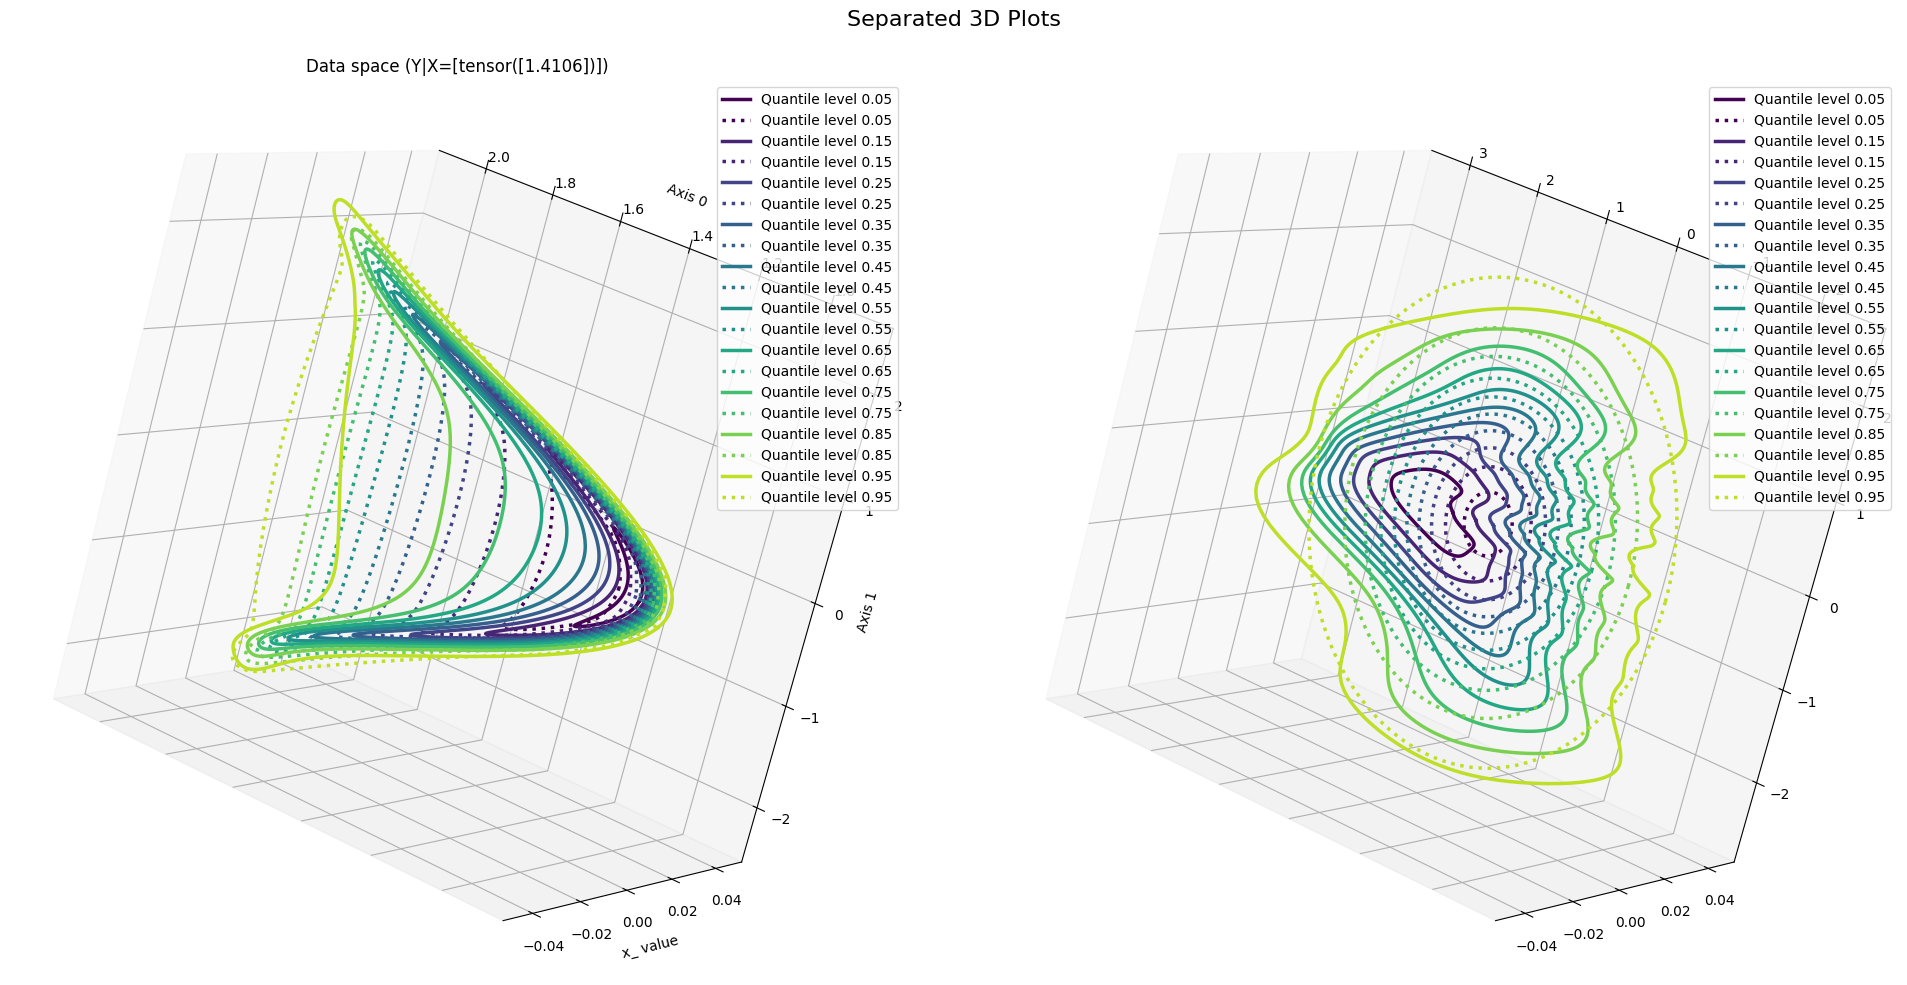

In [11]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import PICNN_FNLVQR_Star, PICNN_FNLVQR_Banana
dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=dataset.sample_covariates(1),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)